In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load clean dataset
df = pd.read_csv("data/cleaned_toronto_dataset.csv")

/var/folders/y0/dyr26mqj66jd33jm686y86wc0000gn/T/ipykernel_66842/306541459.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/cleaned_toronto_dataset.csv")


In [41]:
# Print summary statistics of numerical columns
print(df.describe())

           latitude     longitude  accommodates      bedrooms          beds  \
count  16413.000000  16413.000000  16413.000000  16413.000000  16413.000000   
mean      43.682593    -79.397751      3.085725      1.454152      1.694328   
std        0.049070      0.069643      1.953399      0.813472      1.042841   
min       43.585750    -79.621200      0.000000      1.000000      1.000000   
25%       43.645680    -79.428422      2.000000      1.000000      1.000000   
50%       43.664240    -79.396900      2.000000      1.000000      1.000000   
75%       43.706930    -79.373440      4.000000      2.000000      2.000000   
max       43.837740    -79.127590     16.000000      9.000000     11.000000   

              price  minimum_nights  maximum_nights  availability_365  \
count  16413.000000    16413.000000    16413.000000      16413.000000   
mean     150.714903       26.624566      608.728264        152.494791   
std      110.819230       36.431788      478.941198        138.838288

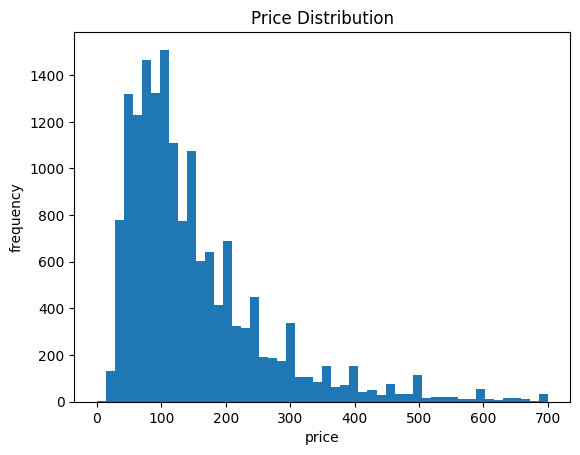

In [42]:
# Look at distribution of price
plt.hist(df["price"], bins=50)
plt.xlabel("price")
plt.ylabel("frequency")
plt.title("Price Distribution")
plt.show()

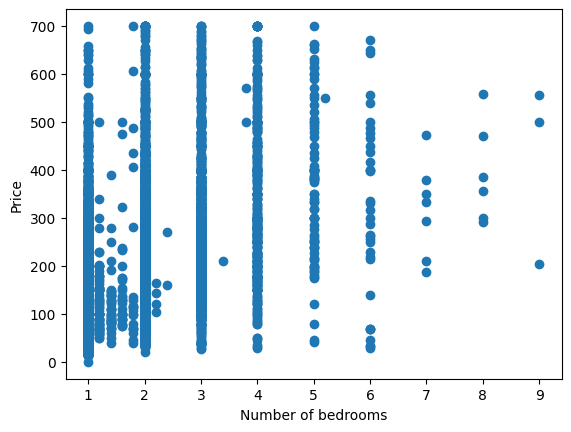

In [43]:
# Scatterplot to visualize number of bedrooms vs price
plt.scatter(df["bedrooms"], df["price"])
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.show()

<Axes: >

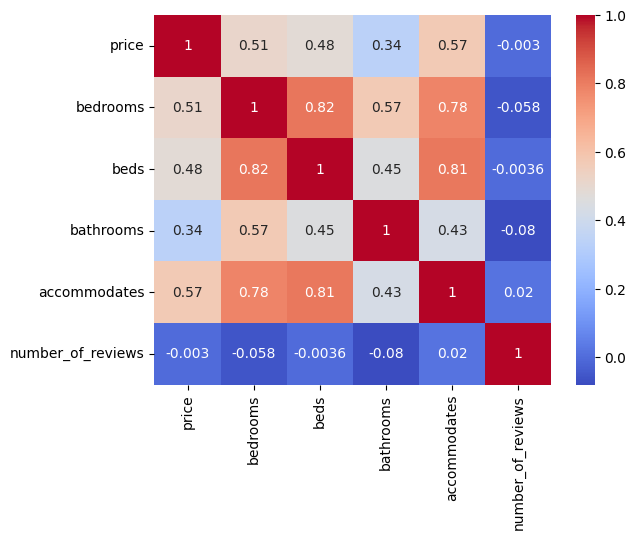

In [44]:
# Create a correlational matrix

# Select the columns of interest
corr_cols = ["price", "bedrooms", "beds", "bathrooms", "accommodates", "number_of_reviews"]
df_num = df[corr_cols]

# Compute the correlation matrix
corr = df_num.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")


Here, we can see that number of bedrooms and number of people accommodated is the most correlated with price. Number of reviews seems to have no correlation.

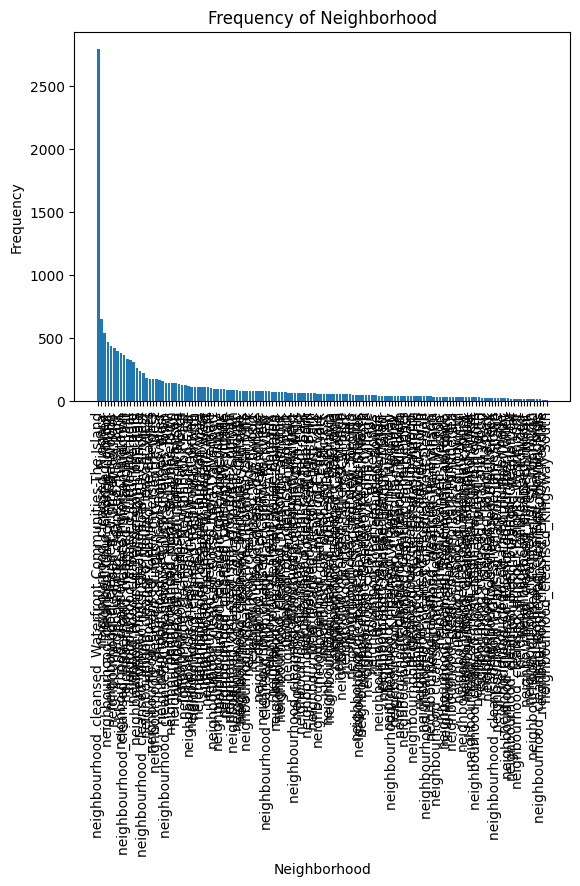

In [50]:
neighbourhood_cols = [col for col in df.columns if col.startswith('neighbourhood_cleansed')]

neighbourhood_freq = df[neighbourhood_cols].sum().sort_values(ascending=False)

plt.bar(neighbourhood_freq.index, neighbourhood_freq.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.title('Frequency of Neighborhood')
plt.show()

We can see that there are many neighbourhoods listed in toronto, however, the most frequent one is "Waterfront Communities - The Island"